Assinatura

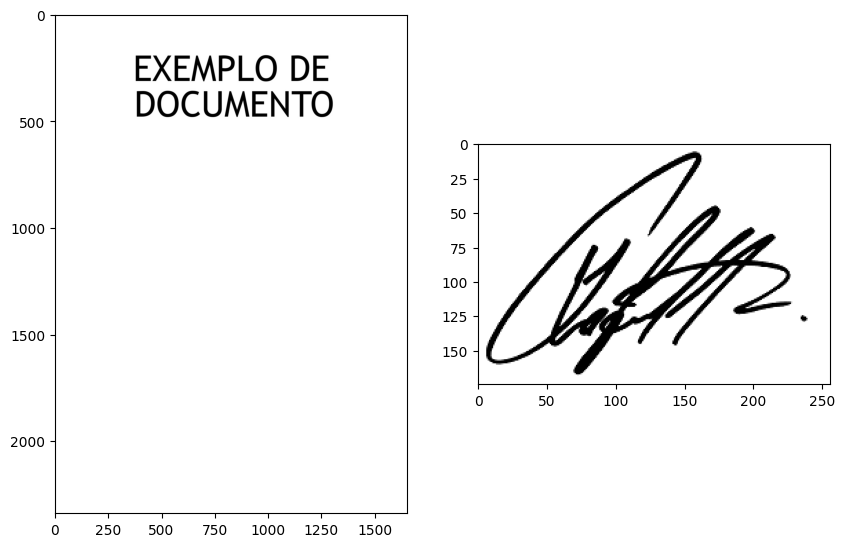

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("exemplo_doc.png", cv2.IMREAD_UNCHANGED)

# Fazer a copia do pdf-imagem
img1 = img.copy()

# ler a assinatura
img2 = cv2.imread("ex_assinatura.png")

plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.show()

Vamos colocar a assinatura no documento

In [2]:
linhas, colunas, canais = img2.shape
roi = img1[100:linhas + 100, 100:colunas + 100]

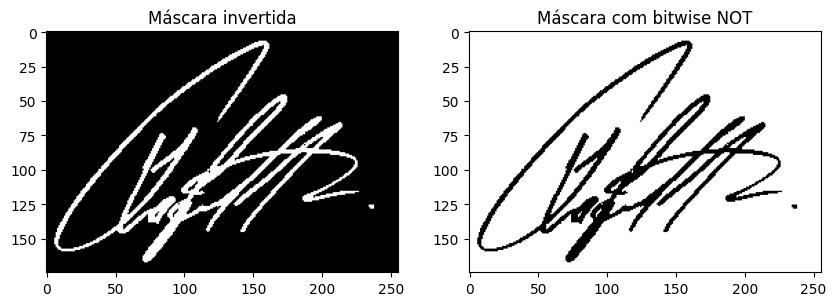

In [5]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 0, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Máscara invertida')

plt.subplot(1, 2, 2)
plt.imshow(mask_inv, cmap='gray')
plt.title('Máscara com bitwise NOT')

plt.show()

Formatações na assinatura

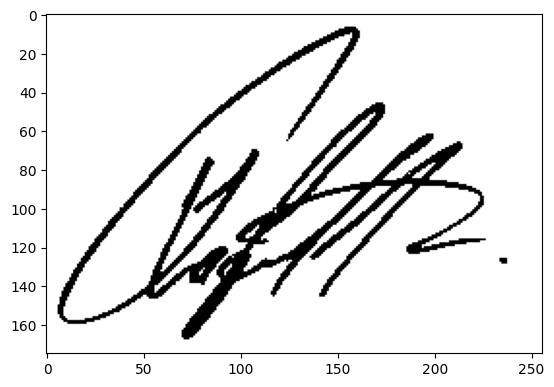

In [6]:
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
plt.imshow(img1_bg)

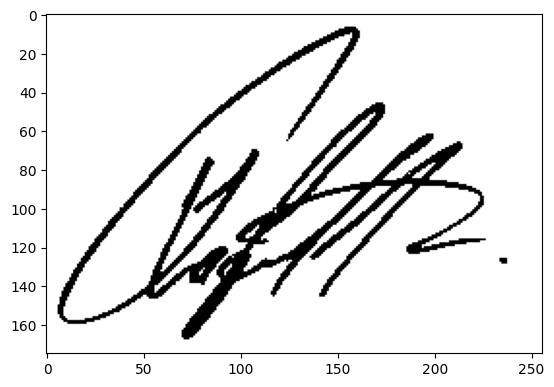

In [7]:
img2_bg = cv2.bitwise_and(img2, img2, mask=mask_inv)

dst = cv2.add(img1_bg, img2_bg)
plt.imshow(dst)

Adição no PDF

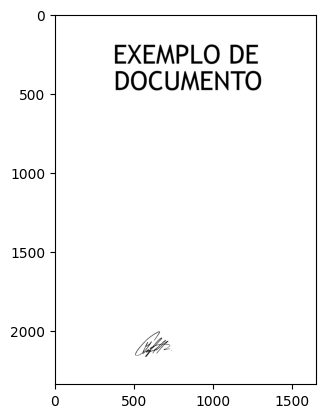

In [8]:
img1[2000:linhas + 2000, 500:colunas + 500] = dst
plt.imshow(img1)